In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

## Loading datasets

In [10]:
data = load_digits()

In [13]:
images = data.data
images.shape

(1797, 64)

In [14]:
labels = data.target
labels.shape

(1797,)

## Computing Covariance matrix

In [28]:
cov_mat = np.cov(images.T)

In [29]:
cov_mat.shape

(64, 64)

## Computing Eigen values and corresponding eigen vectors

In [34]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

In [35]:
eig_val.shape, eig_vec.shape

((64,), (64, 64))

### Scree plot

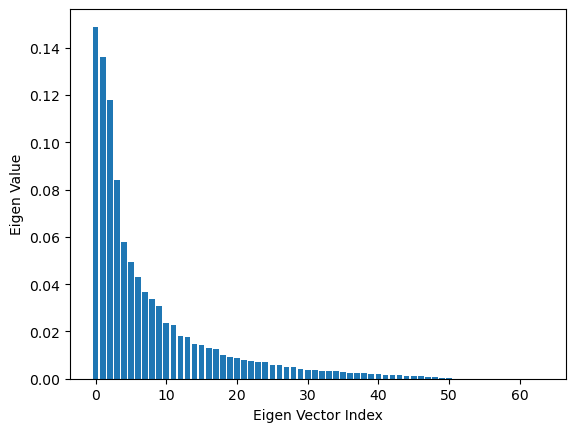

In [75]:
plt.bar(np.arange(64), eig_val/np.sum(eig_val))
plt.xlabel('Eigen Vector Index')
plt.ylabel('Eigen Value')
plt.show()

### Check for correctness

In [56]:
for i in range(len(eig_val)):
    eigv = eig_vec[:,i].reshape(1,64).T
    np.testing.assert_array_almost_equal(cov_mat.dot(eigv), eig_val[i] * eigv, decimal=6, err_msg='Not same', verbose=True)

## Top k Eigen vectors - With top k eigen values
##### Let k = 20

In [79]:
req_eig_vec = eig_vec[:, :20]
req_eig_val = eig_val[:20]

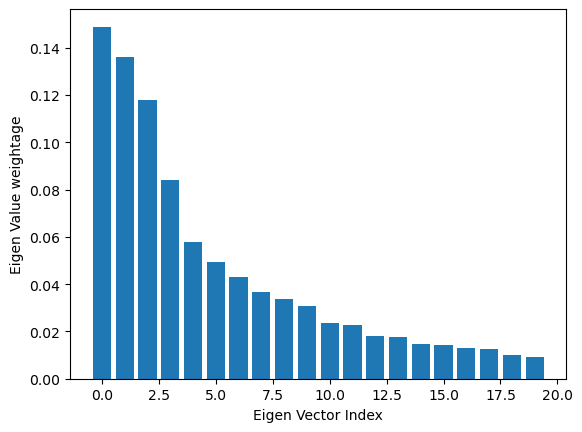

In [82]:
plt.bar(np.arange(20), req_eig_val/np.sum(eig_val))
plt.xlabel('Eigen Vector Index')
plt.ylabel('Eigen Value weightage')
plt.show()

## Transforming to new subspace

In [84]:
req_eig_vec.shape

(64, 20)

In [85]:
images.shape

(1797, 64)

In [88]:
new_image_space = images @ req_eig_vec
new_image_space.shape

(1797, 20)

## Model

In [98]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [90]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 10), random_state=1)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(new_image_space, labels, stratify=labels, random_state=2)

In [100]:
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 10), random_state=1,
              solver='lbfgs')

In [101]:
## Checking how well the model fitted the data
clf.score(X_test, y_test)

0.9222222222222223

## PCA from scikit learn library

In [102]:
from sklearn.decomposition import PCA

In [130]:
pca = PCA(n_components=20)
pca.fit(images)

PCA(n_components=20)

In [131]:
pca.get_covariance().shape

(64, 64)

In [132]:
new_images = pca.fit_transform(images)

In [133]:
new_images.shape

(1797, 20)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(new_images, labels, stratify=labels, random_state=2)

In [135]:
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 10), random_state=1,
              solver='lbfgs')

In [136]:
clf.score(X_test, y_test)

0.9511111111111111